<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/6thWeek/Tugas_ML_6_Clustering_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Impor Pustaka yang Diperlukan ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [8]:
# Memuat dan Memverifikasi Data ---
file_path = '/content/drive/MyDrive/smt akhir/ml/clusteringweek06.csv'
try:
    # Mencoba pemisah koma (default)
    df = pd.read_csv(file_path)
except Exception:
    # Jika gagal, mencoba pemisah titik koma
    df = pd.read_csv(file_path, sep=';')

print(f"Bentuk (Shape) dari dataset: {df.shape}")

Bentuk (Shape) dari dataset: (7195, 22)


In [10]:
# Memeriksa nilai yang kosong
print(f"Jumlah nilai kosong per kolom:\n{df.isnull().sum().sum()} (Total)")

Jumlah nilai kosong per kolom:
0 (Total)


In [11]:
# Penskalaan Seluruh Fitur (x1-x22) ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

In [13]:
# Mengevaluasi Model K-Means ---
inertia = []
silhouette_k = []
calinski_k = []
davies_k = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    labels = kmeans.labels_

    inertia.append(kmeans.inertia_)
    silhouette_k.append(silhouette_score(features_scaled, labels))
    calinski_k.append(calinski_harabasz_score(features_scaled, labels))
    davies_k.append(davies_bouldin_score(features_scaled, labels))

In [15]:
# Mengevaluasi Model Agglomerative Clustering ---
silhouette_agg = []
calinski_agg = []
davies_agg = []

for k in K:
    agg_cluster = AgglomerativeClustering(n_clusters=k)
    labels = agg_cluster.fit_predict(features_scaled)

    silhouette_agg.append(silhouette_score(features_scaled, labels))
    calinski_agg.append(calinski_harabasz_score(features_scaled, labels))
    davies_agg.append(davies_bouldin_score(features_scaled, labels))

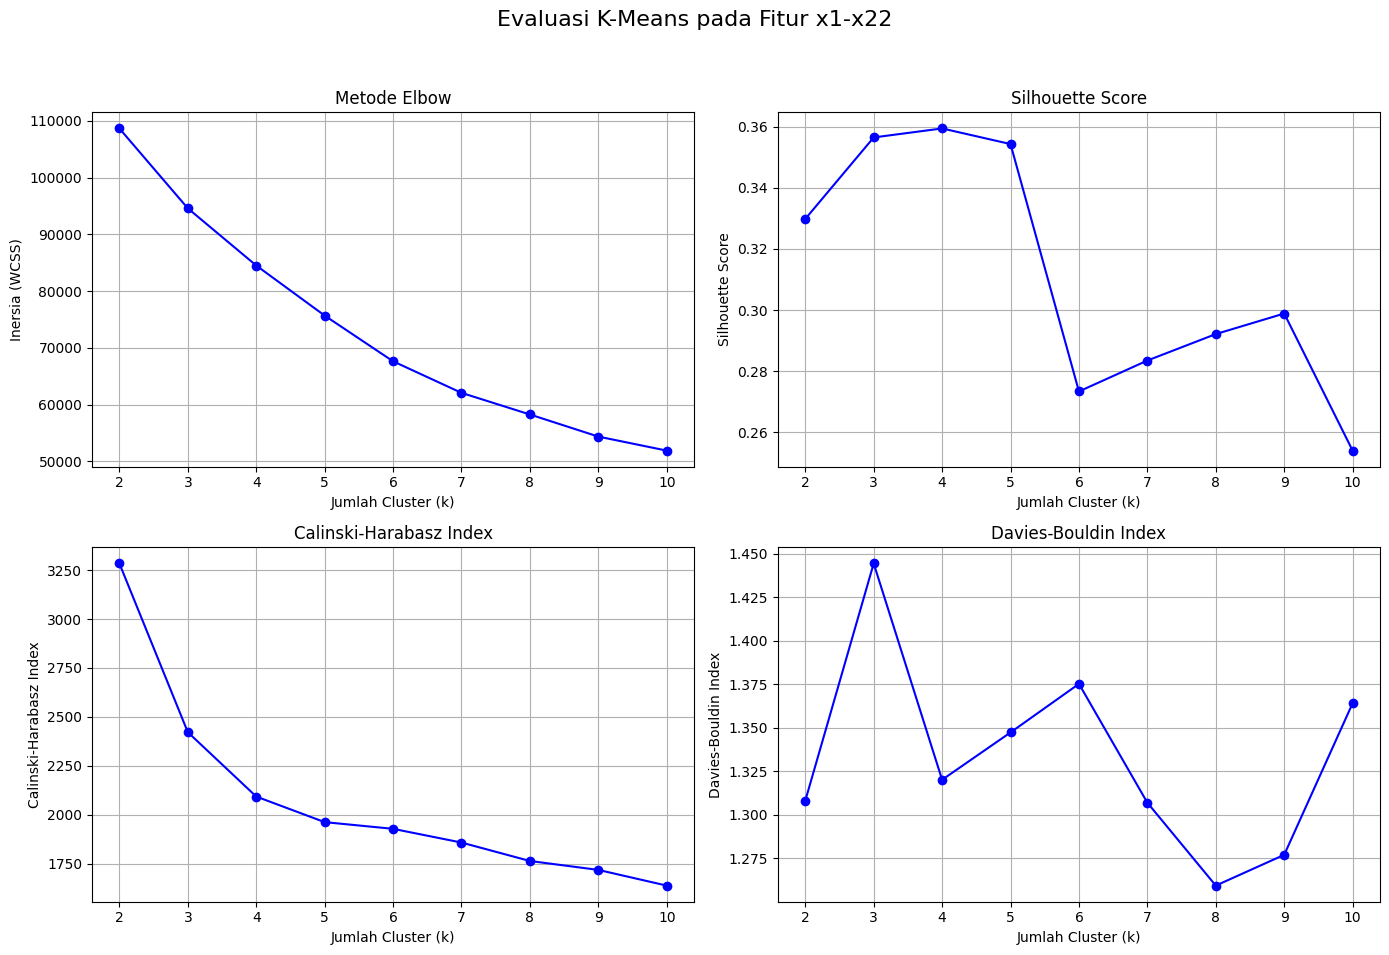

In [16]:
# Visualisasi Hasil Evaluasi ---
# Plot untuk K-Means
plt.figure(figsize=(14, 10))
plt.suptitle('Evaluasi K-Means pada Fitur x1-x22', fontsize=16)
plt.subplot(2, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia (WCSS)')
plt.title('Metode Elbow')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(K, silhouette_k, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(K, calinski_k, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(K, davies_k, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

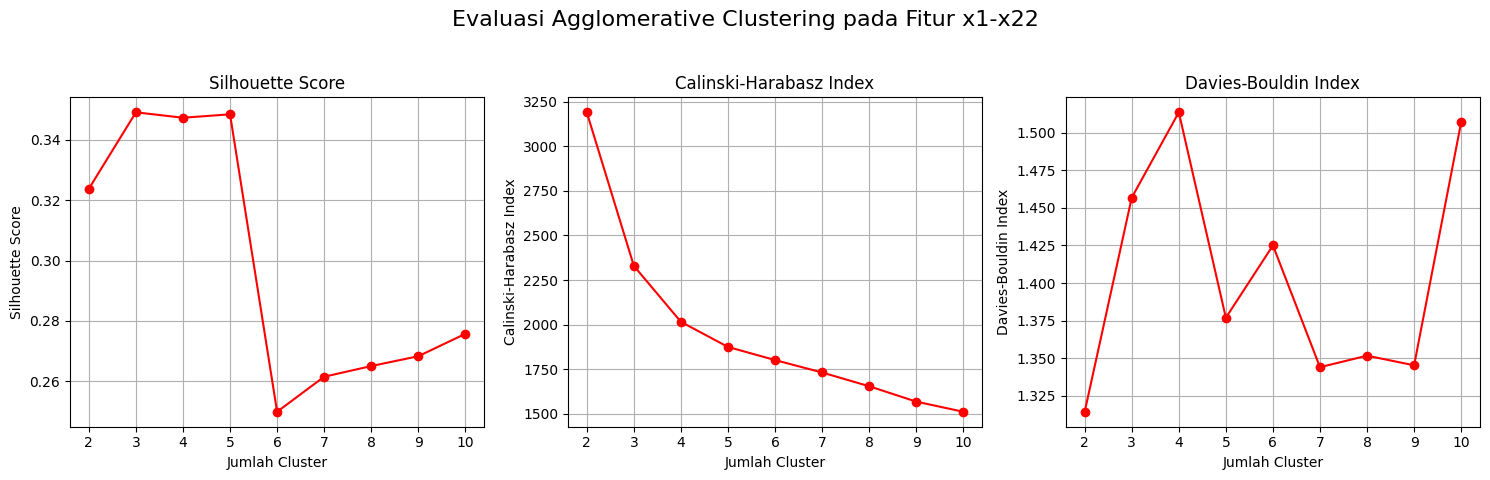

In [17]:
# Plot untuk Agglomerative Clustering
plt.figure(figsize=(15, 5))
plt.suptitle('Evaluasi Agglomerative Clustering pada Fitur x1-x22', fontsize=16)
plt.subplot(1, 3, 1)
plt.plot(K, silhouette_agg, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(K, calinski_agg, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(K, davies_agg, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index')
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
# Jumlah cluster final harus ditentukan dari analisis visual plot di atas.
final_k = 4
print(f"Berdasarkan analisis visual, dipilih k = {final_k} untuk model final.")

# Latih model K-Means final
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_final.fit_predict(features_scaled)

# Latih model Agglomerative final
agg_final = AgglomerativeClustering(n_clusters=final_k)
df['Agg_Cluster'] = agg_final.fit_predict(features_scaled)

# Tampilkan hasil akhir
print(f"\nHASIL AKHIR CLUSTERING (K-Means dengan k={final_k})")
print("Jumlah Data per Cluster:")
print(df['KMeans_Cluster'].value_counts().sort_index())

print(f"\nHASIL AKHIR CLUSTERING (Agglomerative dengan k={final_k})")
print("Jumlah Data per Cluster:")
print(df['Agg_Cluster'].value_counts().sort_index())

Berdasarkan analisis visual, dipilih k = 4 untuk model final.

HASIL AKHIR CLUSTERING (K-Means dengan k=4)
Jumlah Data per Cluster:
KMeans_Cluster
0    2567
1    3574
2     631
3     423
Name: count, dtype: int64

HASIL AKHIR CLUSTERING (Agglomerative dengan k=4)
Jumlah Data per Cluster:
Agg_Cluster
0    2484
1    3478
2     583
3     650
Name: count, dtype: int64


*   Gunakan Metode Elbow untuk mendapatkan kandidat awal jumlah cluster (k).
*   Validasi kandidat tersebut dengan Silhouette Score dan Calinski-Harabasz Index. Carilah nilai k yang memberikan skor tertinggi pada kedua metrik ini.
*   Gunakan Davies-Bouldin Index sebagai konfirmasi akhir, di mana nilai k yang sama idealnya juga harus menunjukkan skor yang rendah.








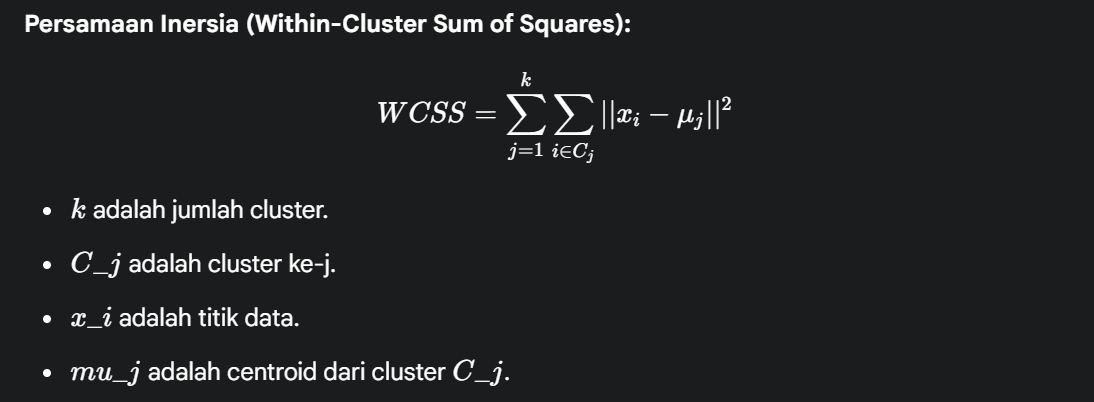

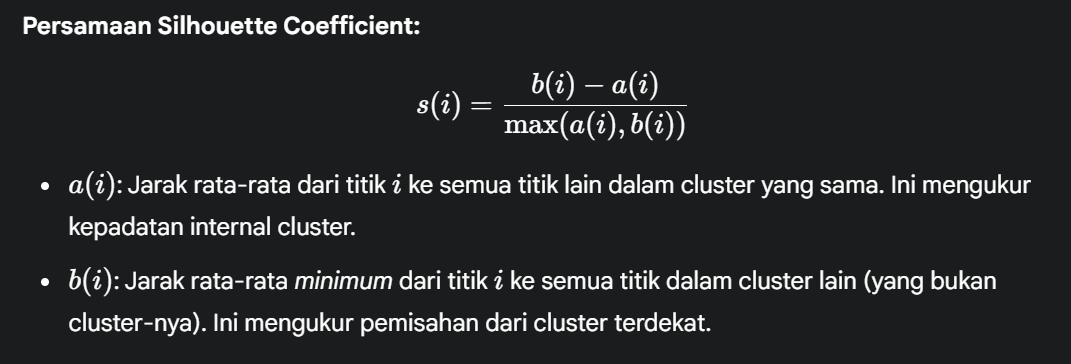

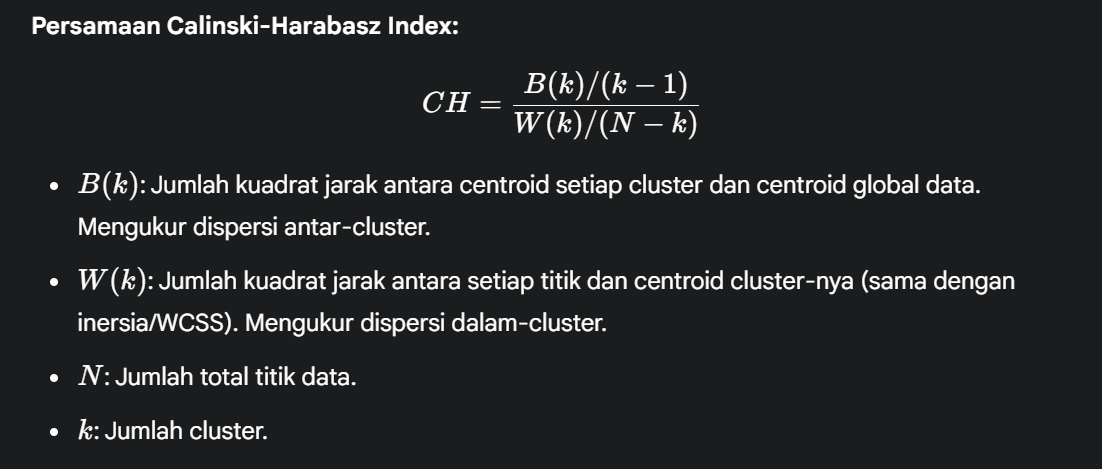

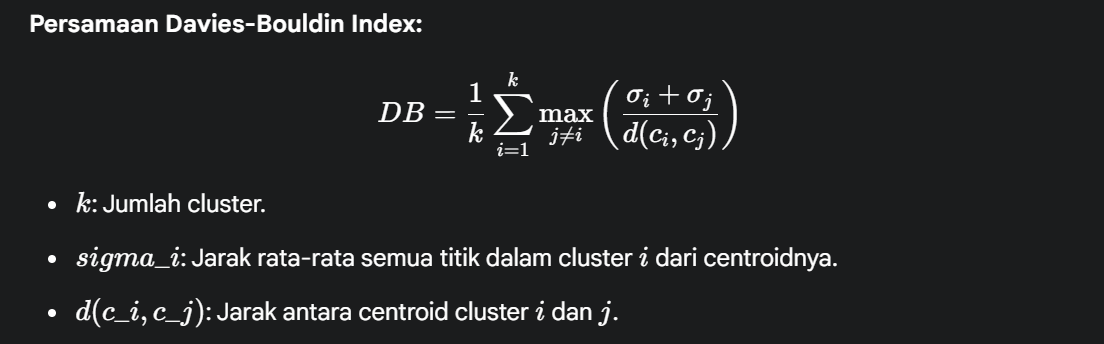